<a href="https://colab.research.google.com/github/Romaiz/Pycharm_Tutorials/blob/main/pytorch_tut_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x,y = torch.load('/content/drive/MyDrive/MNIST/processed/training.pt')

In [6]:
x.shape

torch.Size([60000, 28, 28])

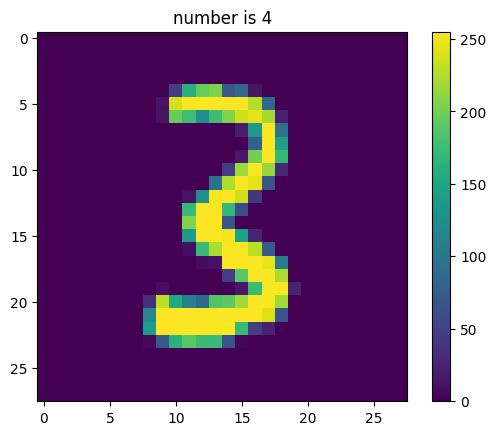

In [9]:
plt.imshow(x[50000].numpy())
plt.title(f'number is {y[2].numpy()}')
plt.colorbar()
plt.show()

In [8]:
y

tensor([5, 0, 4,  ..., 5, 6, 8])

In [10]:
y[50000]

tensor(3)

In [11]:
y_new = F.one_hot(y, num_classes=10)
y_new.shape

torch.Size([60000, 10])

In [12]:
x.view(-1,28**2).shape

torch.Size([60000, 784])

In [13]:
class CTDataset(Dataset):
  def __init__(self, filepath):
    self.x, self.y = torch.load(filepath)
    self.x = self.x/255
    self.y = F.one_hot(self.y, num_classes=10).to(float)
  def __len__(self):
    return self.x.shape[0]
  def __getitem__(self, ix):
    return self.x[ix], self.y[ix]

In [14]:
training_ds = CTDataset('/content/drive/MyDrive/MNIST/processed/training.pt')
testing_ds = CTDataset('/content/drive/MyDrive/MNIST/processed/test.pt')

In [15]:
len(training_ds)

60000

In [16]:
len(testing_ds)

10000

In [17]:
train_dl = DataLoader(training_ds, batch_size = 5)

In [18]:
L = nn.CrossEntropyLoss()

In [20]:
class myNeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.Matrix1 = nn.Linear(28**2, 100)
    self.Matrix2 = nn.Linear(100, 50)
    self.Matrix3 = nn.Linear(50, 10)
    self.R = nn.ReLU()
  def forward(self, x):
    x = x.view(-1,28**2)
    x = self.R(self.Matrix1(x))
    x = self.R(self.Matrix2(x))
    x = self.Matrix3(x)
    return x.squeeze()

In [21]:
xs, ys = training_ds[0:4]

In [22]:
f = myNeuralNetwork()

In [23]:
def train_model(dl, f, n_epochs=50):
  opt = SGD(f.parameters(), lr = 0.001)
  L = nn.CrossEntropyLoss()

  #Train Model
  losses = []
  epochs = []
  for epoch in range (n_epochs):
    print(f'Epoch{epoch}')
    N = len(dl)
    for i, (x,y) in enumerate(dl):
      opt.zero_grad()
      loss_value = L(f(x), y)
      loss_value.backward()
      opt.step()
      epochs.append(epoch+1/N)
      losses.append(loss_value.item())
  return np.array(epochs), np.array(losses)

In [25]:
epoch_data, loss_data = train_model(train_dl, f)

Epoch0
Epoch1
Epoch2
Epoch3
Epoch4
Epoch5
Epoch6
Epoch7
Epoch8
Epoch9
Epoch10
Epoch11
Epoch12
Epoch13
Epoch14
Epoch15
Epoch16
Epoch17
Epoch18
Epoch19
Epoch20
Epoch21
Epoch22
Epoch23
Epoch24
Epoch25
Epoch26
Epoch27
Epoch28
Epoch29
Epoch30
Epoch31
Epoch32
Epoch33
Epoch34
Epoch35
Epoch36
Epoch37
Epoch38
Epoch39
Epoch40
Epoch41
Epoch42
Epoch43
Epoch44
Epoch45
Epoch46
Epoch47
Epoch48
Epoch49


In [26]:
epoch_data_avg = epoch_data.reshape(50, -1).mean(axis=1)
loss_data_avg = loss_data.reshape(50, -1).mean(axis=1)

Text(0.5, 1.0, 'Cross Entropy (averaged per Epoch)')

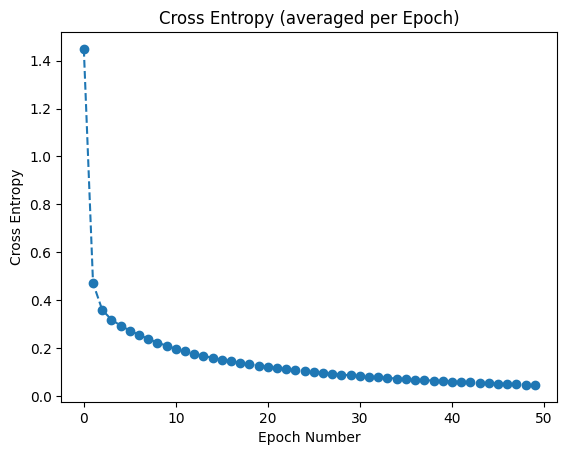

In [28]:
plt.plot(epoch_data_avg, loss_data_avg, 'o--')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (averaged per Epoch)')

AttributeError: ignored

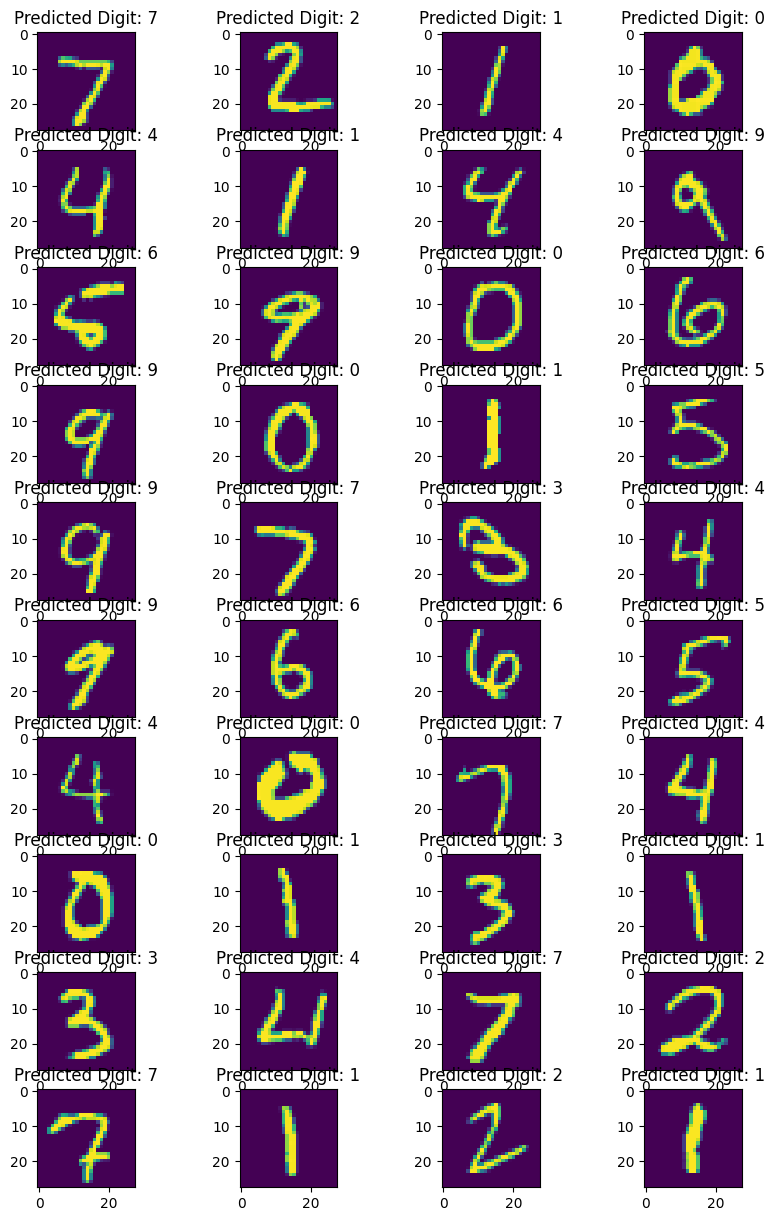

In [29]:
xs, ys = testing_ds[:2000]
yhats = f(xs).argmax(axis=1)
fig, ax = plt.subplots(10,4,figsize=(10,15))
for i in range(40):
  plt.subplot(10,4,i+1)
  plt.imshow(xs[i])
  plt.title(f'Predicted Digit: {yhats[i]}')
fig.tight.layout()
plt.show()